In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
X = torch.linspace(-6, 6, 100).view(-1, 1)
Y = -(0.3)*X**3 + 2*torch.randn(X.size())

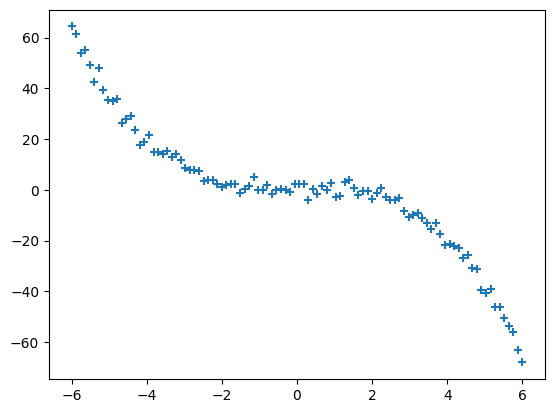

In [ ]:
plt.scatter(X,y, marker='+')
plt.show()

In [ ]:
def forward(x, w1, w2, b):
  out = w2*x**3 + w1*x + b
  return out

In [ ]:
def criterion(y, y_hat):
  return torch.mean((y-y_hat)**2)

#Simple Training Loop

In [ ]:
w1 = torch.tensor(-1., requires_grad=True)
w2 = torch.tensor(4., requires_grad=True)
b = torch.tensor(-3., requires_grad=True)

n_iter = 10000
lr = 0.0001

loss = []
time_steps = [i for i in range(n_iter)]
for i in range(n_iter):
  y_hat = forward(X, w1, w2, b)
  J = criterion(y, y_hat)
  loss.append(J)
  J.backward()
  with torch.no_grad():
    w1 -= lr * w1.grad
    w2 -= lr * w2.grad
    b -= lr * b.grad
  if i == (n_iter-1): print(f'Iter = {i},  Loss = {J}')
  w1.grad.zero_()
  w2.grad.zero_()
  b.grad.zero_()


Iter = 9999,  Loss = 4.629144668579102


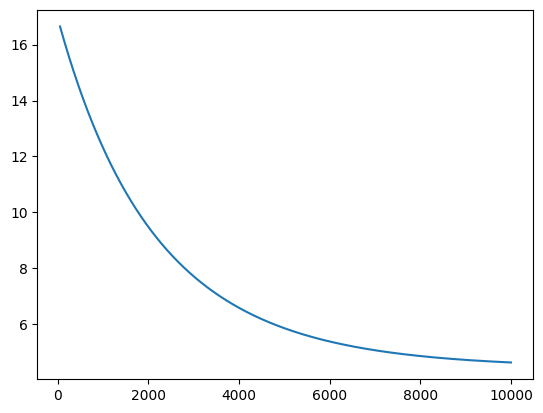

In [ ]:
plt.plot(time_steps[50:], [i.detach().numpy() for i in loss[50:]])

In [ ]:
y_pred = forward(X, w1, w2, b)

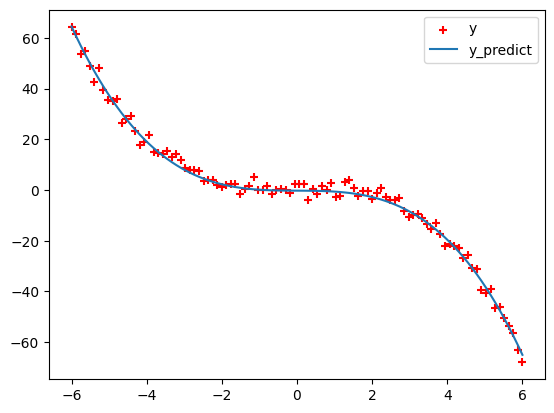

In [ ]:
plt.scatter(X, y, label = 'y', marker='+', color = 'red')
plt.plot(X.detach().numpy(), y_pred.detach().numpy(), label = 'y_predict')
plt.legend()
plt.show()

#Stochastic Training Loop

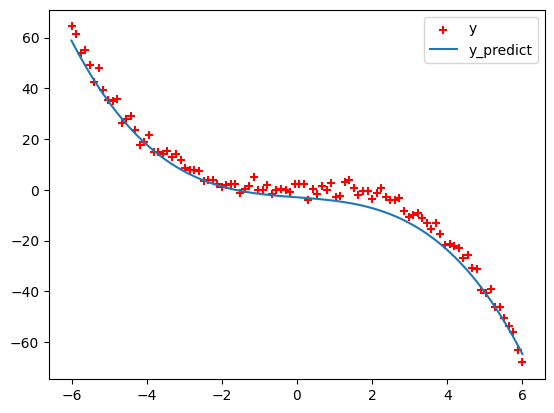

In [ ]:
w1 = torch.tensor(-1., requires_grad=True)
w2 = torch.tensor(4., requires_grad=True)
b = torch.tensor(-3., requires_grad=True)

n_iter = 100
lr = 0.1e-5

loss = []
time_steps = [i for i in range(n_iter)]
for i in range(n_iter):
  loss.append(criterion(forward(X, w1, w2, b), y))
  for i, j in zip(X,y):
    y_hat = forward(i, w1, w2, b)
    J = criterion(j, y_hat)
    J.backward()
    with torch.no_grad():
      w1 -= lr * w1.grad
      w2 -= lr * w2.grad
      b -= lr * b.grad
    w1.grad.zero_()
    w2.grad.zero_()
    b.grad.zero_()


y_pred = forward(X, w1, w2, b)
plt.scatter(X, y, label = 'y', marker='+', color = 'red')
plt.plot(X.detach().numpy(), y_pred.detach().numpy(), label = 'y_predict')
plt.legend()
plt.show()